In [1]:
import numpy as np
from scipy.io import loadmat
import h5py
from EnsemblePursuit.EnsemblePursuit import EnsemblePursuit
import matplotlib.pyplot as plt
%matplotlib inline

# Load neural timeseries

In [38]:
#Data downloaded from https://janelia.figshare.com/articles/Whole-brain_light-sheet_imaging_data/7272617

In [25]:
hf = h5py.File('/media/maria/DATA1/Documents/ZebraFish/subject_1/TimeSeries.h5', 'r')
#print(hf['absIx'])
neural_dat=np.array(hf['CellResp'])

In [26]:
print(neural_dat.shape)

(2880, 83205)


# Get behavior, stim and cell position arrays

In [27]:
regressors=loadmat('/media/maria/DATA1/Documents/ZebraFish/subject_1/data_full.mat')

In [28]:
cell_pos=regressors['data']['CellXYZ'][0][0]

In [29]:
#Exclude bad cells
missing_values=regressors['data']['IX_inval_anat'][0][0]

In [33]:
cell_pos=np.delete(cell_pos,missing_values,axis=0)

In [34]:
print(cell_pos.shape)

(83205, 3)


# Subsample neurons

In [35]:
np.seed=7
random_neurons=np.random.choice(neural_dat.shape[1],10000,replace=False)

In [36]:
neural_dat=neural_dat[:,random_neurons]

In [37]:
cell_pos=cell_pos[random_neurons,:]

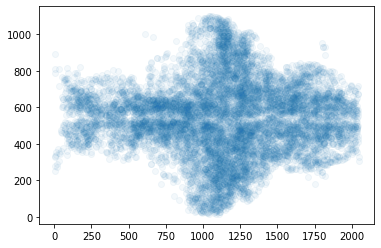

In [45]:
plt.scatter(cell_pos[:,0], cell_pos[:,1], cmap='bwr', alpha = .05)

# Ensemble Pursuit

In [49]:
ep=EnsemblePursuit(n_components=100,lam=0.01,n_kmeans=100)
ep.fit(neural_dat)

obtained 100 PCs in 2.6969 seconds
initialized 100 clusters with k-means in 2.6384 seconds
ensemble 0, time 2.00, nr neurons 2603, EV 0.0429
ensemble 25, time 31.81, nr neurons 537, EV 0.1956
ensemble 50, time 44.35, nr neurons 301, EV 0.2278
ensemble 75, time 54.53, nr neurons 195, EV 0.2485
ensemble 99, time 61.65, nr neurons 156, EV 0.2621
average sparsity is 0.0604


In [50]:
print(ep.weights.shape)

(10000, 100)


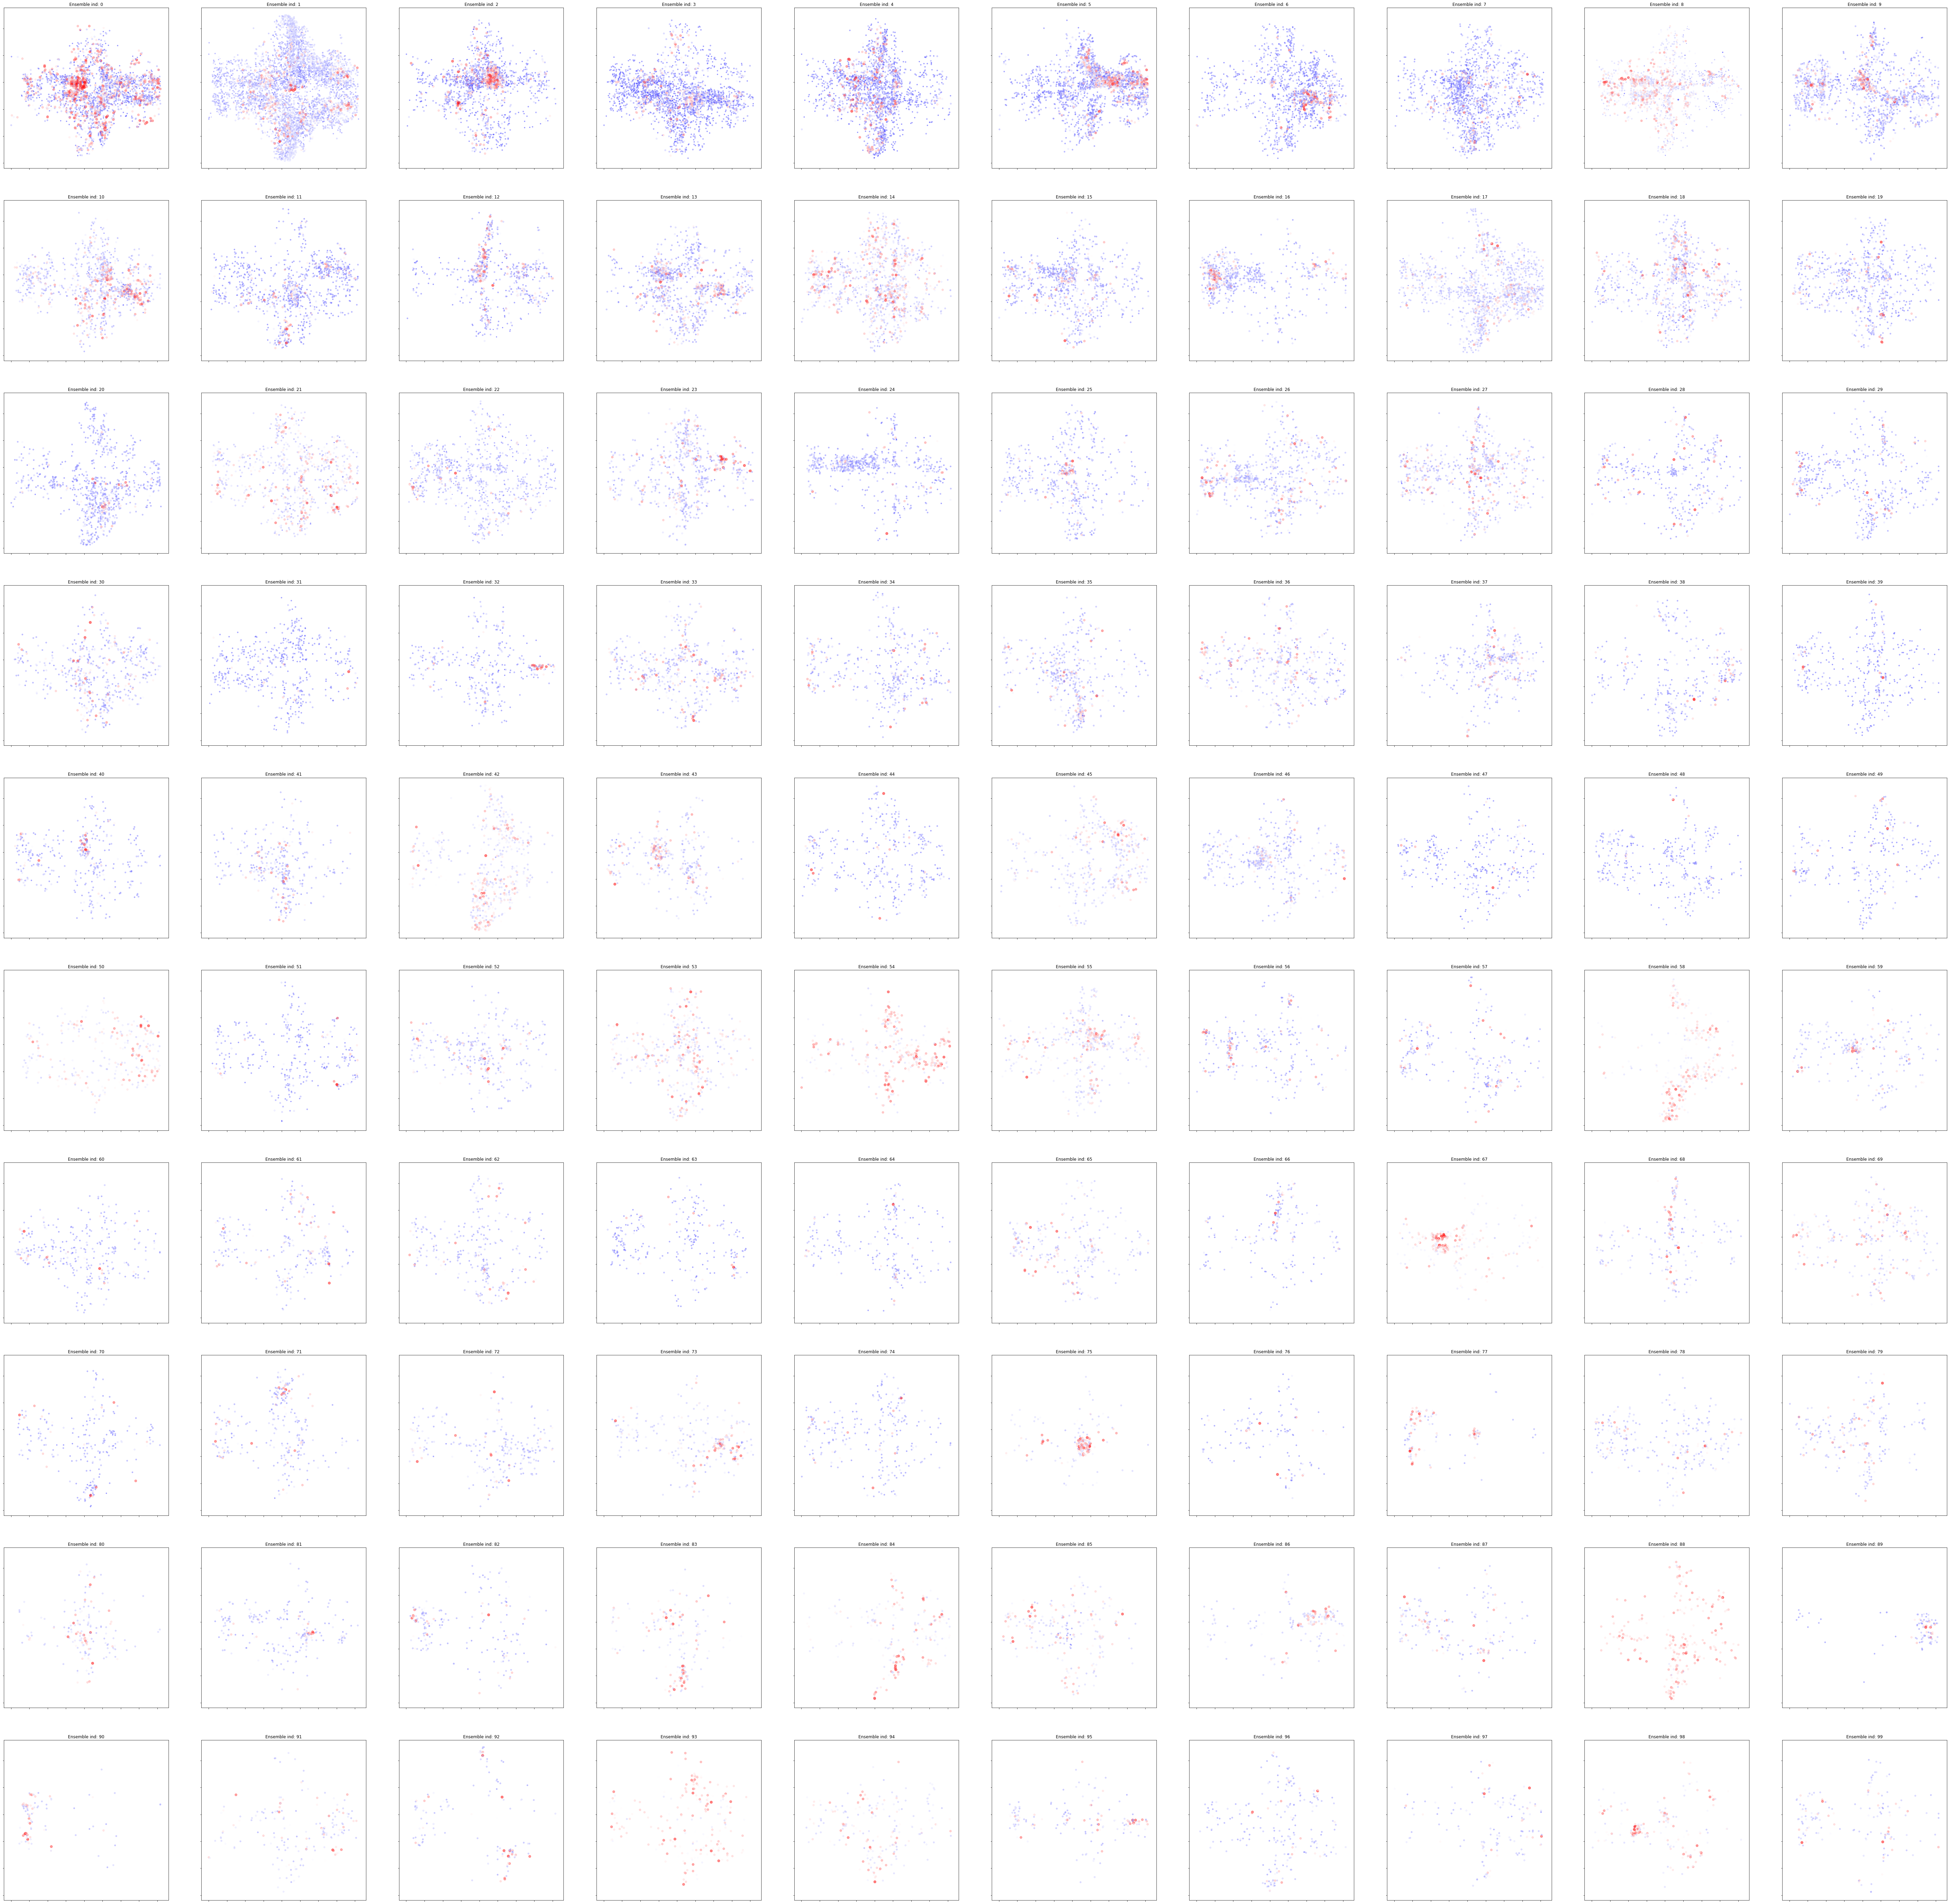

In [52]:
plt.figure(figsize=(100,100))
for ensemble in range(100):
    comp= ep.weights[:,ensemble]
    comp= comp/np.max(np.abs(comp))
    lam = np.abs(comp)    
    ax=plt.subplot(10,10,1+ensemble)
    plt.scatter(cell_pos[:,0], cell_pos[:,1], s = 50 * lam, c = comp, cmap='bwr', alpha = .5)
    plt.title('Ensemble ind: '+str(ensemble))
    ax.set_yticklabels([])
    ax.set_xticklabels([])